In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Before running

Run `3_aggregate_results.py` and `4_download_checkpoints.py` to generate or download metrics and checkpoints. See README for more info.

In [3]:
results = pd.read_csv("results/norman_data_efficiency_results.csv")
results["frac_combination_cells_train"] = results["data_module_kwargs.frac_combination_cells_train"]
# had set of experiments with misconfigured hyperparameters to exclude (SVAE+ with combinations not encoded uniquely)
results = results.dropna(subset=["val/IWELBO"])

In [4]:
curr = results[(results["mean_field_encoder"] != True)]
for model in results["model"].unique():
    print(model)
    curr = results[(results["model"] == model) & (results["mean_field_encoder"] != True)]
    curr = curr[curr["frac_combination_cells_train"] == 1]

    curr = curr.groupby(["encode_unique", "mean_field_encoder", "model", "guide", "n_layers", "frac_combination_cells_train", "mask_prior_prob", "mask_beta_concentration_2", "n_latent"], dropna=False)\
                    [["val/IWELBO"]]\
                    .agg(["mean", "std", "count"])
    display(curr.sort_values(("val/IWELBO", "mean"), ascending=False))

sams_vae_mean_field


val/IWELBO  \
                                                                                                                                                                                  mean   
encode_unique mean_field_encoder model               guide                       n_layers frac_combination_cells_train mask_prior_prob mask_beta_concentration_2 n_latent                
False         False              sams_vae_mean_field SAMSVAEMeanFieldNormalGuide 1        1.0                          0.01            NaN                       200      -1789.094751   
                                                                                 4        1.0                          0.01            NaN                       200      -1789.098340   
                                                                                 2        1.0                          0.01            NaN                       200      -1789.190991   
True          False              sams_vae_mean_field SAMSVAEMeanFieldNormalGuide 1        1.0                          0.01            NaN                       200      -1789.263770   
                                                                                 4        1.0                          0.01            NaN                       200      -1789.453613   
                                                                                 2        1.0                          0.01            NaN                       200      -1789.660132   

                                                                                                                                                                                     \
                                                                                                                                                                                std   
encode_unique mean_field_encoder model               guide                       n_layers frac_combination_cells_train mask_prior_prob mask_beta_concentration_2 n_latent             
False         False              sams_vae_mean_field SAMSVAEMeanFieldNormalGuide 1        1.0                          0.01            NaN                       200       1.829761   
                                                                                 4        1.0                          0.01            NaN                       200       1.854078   
                                                                                 2        1.0                          0.01            NaN                       200       1.742281   
True          False              sams_vae_mean_field SAMSVAEMeanFieldNormalGuide 1        1.0                          0.01            NaN                       200       1.879567   
                                                                                 4        1.0                          0.01            NaN                       200       1.772019   
                                                                                 2        1.0                          0.01            NaN                       200       1.890635   

                                                                                                                                                                                 
                                                                                                                                                                          count  
encode_unique mean_field_encoder model               guide                       n_layers frac_combination_cells_train mask_prior_prob mask_beta_concentration_2 n_latent        
False         False              sams_vae_mean_field SAMSVAEMeanFieldNormalGuide 1        1.0                          0.01            NaN                       200          5  
                                                                                 4        1.0                          0.01            Na

sams_vae_correlated


val/IWELBO  \
                                                                                                                                                                                   mean   
encode_unique mean_field_encoder model               guide                        n_layers frac_combination_cells_train mask_prior_prob mask_beta_concentration_2 n_latent                
False         False              sams_vae_correlated SAMSVAECorrelatedNormalGuide 1        1.0                          0.01            NaN                       200      -1788.802490   
                                                                                  2        1.0                          0.01            NaN                       200      -1789.144116   
True          False              sams_vae_correlated SAMSVAECorrelatedNormalGuide 2        1.0                          0.01            NaN                       200      -1789.145630   
                                                                                  1        1.0                          0.01            NaN                       200      -1789.237256   
                                                                                  4        1.0                          0.01            NaN                       200      -1789.882983   
False         False              sams_vae_correlated SAMSVAECorrelatedNormalGuide 4        1.0                          0.01            NaN                       200      -1789.979517   

                                                                                                                                                                                      \
                                                                                                                                                                                 std   
encode_unique mean_field_encoder model               guide                        n_layers frac_combination_cells_train mask_prior_prob mask_beta_concentration_2 n_latent             
False         False              sams_vae_correlated SAMSVAECorrelatedNormalGuide 1        1.0                          0.01            NaN                       200       1.850976   
                                                                                  2        1.0                          0.01            NaN                       200       1.727358   
True          False              sams_vae_correlated SAMSVAECorrelatedNormalGuide 2        1.0                          0.01            NaN                       200       1.875140   
                                                                                  1        1.0                          0.01            NaN                       200       1.883814   
                                                                                  4        1.0                          0.01            NaN                       200       1.965535   
False         False              sams_vae_correlated SAMSVAECorrelatedNormalGuide 4        1.0                          0.01            NaN                       200       1.987837   

                                                                                                                                                                                  
                                                                                                                                                                           count  
encode_unique mean_field_encoder model               guide                        n_layers frac_combination_cells_train mask_prior_prob mask_beta_concentration_2 n_latent        
False         False              sams_vae_correlated SAMSVAECorrelatedNormalGuide 1        1.0                          0.01            NaN                       200          5  
                                                                                  2        1.0                      

cpa_vae


val/IWELBO  \
                                                                                                                                                            mean   
encode_unique mean_field_encoder model   guide             n_layers frac_combination_cells_train mask_prior_prob mask_beta_concentration_2 n_latent                
True          False              cpa_vae CPAVAENormalGuide 4        1.0                          NaN             NaN                       200      -1788.934961   
                                                           1        1.0                          NaN             NaN                       200      -1788.962866   
False         False              cpa_vae CPAVAENormalGuide 1        1.0                          NaN             NaN                       200      -1789.151538   
                                                           2        1.0                          NaN             NaN                       200      -1789.166724   
True          False              cpa_vae CPAVAENormalGuide 2        1.0                          NaN             NaN                       200      -1789.184839   
False         False              cpa_vae CPAVAENormalGuide 4        1.0                          NaN             NaN                       200      -1789.212012   

                                                                                                                                                               \
                                                                                                                                                          std   
encode_unique mean_field_encoder model   guide             n_layers frac_combination_cells_train mask_prior_prob mask_beta_concentration_2 n_latent             
True          False              cpa_vae CPAVAENormalGuide 4        1.0                          NaN             NaN                       200       1.912729   
                                                           1        1.0                          NaN             NaN                       200       1.825808   
False         False              cpa_vae CPAVAENormalGuide 1        1.0                          NaN             NaN                       200       1.855718   
                                                           2        1.0                          NaN             NaN                       200       1.838635   
True          False              cpa_vae CPAVAENormalGuide 2        1.0                          NaN             NaN                       200       1.931327   
False         False              cpa_vae CPAVAENormalGuide 4        1.0                          NaN             NaN                       200       1.740699   

                                                                                                                                                           
                                                                                                                                                    count  
encode_unique mean_field_encoder model   guide             n_layers frac_combination_cells_train mask_prior_prob mask_beta_concentration_2 n_latent        
True          False              cpa_vae CPAVAENormalGuide 4        1.0                          NaN             NaN                       200          5  
                                                           1        1.0                          NaN             NaN                       200          5  
False         False              cpa_vae CPAVAENormalGuide 1        1.0                          NaN             NaN                       200          5  
                                                           2        1.0                          NaN             NaN                       200          5  
True          False              cpa_vae CPAVAENormalGuide 2        1.0                          NaN             NaN               

svae+


val/IWELBO  \
                                                                                                                                                      mean   
encode_unique mean_field_encoder model guide         n_layers frac_combination_cells_train mask_prior_prob mask_beta_concentration_2 n_latent                
True          NaN                svae+ SVAEPlusGuide 2        1.0                          NaN             2.0                       200      -1791.341162   
                                                     1        1.0                          NaN             2.0                       200      -1791.369580   
                                                     4        1.0                          NaN             2.0                       200      -1791.942065   

                                                                                                                                                         \
                                                                                                                                                    std   
encode_unique mean_field_encoder model guide         n_layers frac_combination_cells_train mask_prior_prob mask_beta_concentration_2 n_latent             
True          NaN                svae+ SVAEPlusGuide 2        1.0                          NaN             2.0                       200       1.953087   
                                                     1        1.0                          NaN             2.0                       200       1.936527   
                                                     4        1.0                          NaN             2.0                       200       2.108567   

                                                                                                                                                     
                                                                                                                                              count  
encode_unique mean_field_encoder model guide         n_layers frac_combination_cells_train mask_prior_prob mask_beta_concentration_2 n_latent        
True          NaN                svae+ SVAEPlusGuide 2        1.0                          NaN             2.0                       200          5  
                                                     1        1.0                          NaN             2.0                       200          5  
                                                     4        1.0                          NaN             2.0                       200          5

conditional_vae


val/IWELBO  \
                                                                                                                                                                      mean   
encode_unique mean_field_encoder model           guide               n_layers frac_combination_cells_train mask_prior_prob mask_beta_concentration_2 n_latent                
False         NaN                conditional_vae ConditionalVAEGuide 1        1.0                          NaN             NaN                       200      -1790.361548   
                                                                     2        1.0                          NaN             NaN                       200      -1790.632690   
                                                                     4        1.0                          NaN             NaN                       200      -1791.098120   
True          NaN                conditional_vae ConditionalVAEGuide 2        1.0                          NaN             NaN                       200      -1791.741577   
                                                                     1        1.0                          NaN             NaN                       200      -1791.840039   
                                                                     4        1.0                          NaN             NaN                       200      -1792.395874   

                                                                                                                                                                         \
                                                                                                                                                                    std   
encode_unique mean_field_encoder model           guide               n_layers frac_combination_cells_train mask_prior_prob mask_beta_concentration_2 n_latent             
False         NaN                conditional_vae ConditionalVAEGuide 1        1.0                          NaN             NaN                       200       1.826410   
                                                                     2        1.0                          NaN             NaN                       200       1.729703   
                                                                     4        1.0                          NaN             NaN                       200       1.997160   
True          NaN                conditional_vae ConditionalVAEGuide 2        1.0                          NaN             NaN                       200       1.702535   
                                                                     1        1.0                          NaN             NaN                       200       1.813639   
                                                                     4        1.0                          NaN             NaN                       200       1.768193   

                                                                                                                                                                     
                                                                                                                                                              count  
encode_unique mean_field_encoder model           guide               n_layers frac_combination_cells_train mask_prior_prob mask_beta_concentration_2 n_latent        
False         NaN                conditional_vae ConditionalVAEGuide 1        1.0                          NaN             NaN                       200          5  
                                                                     2        1.0                          NaN             NaN                       200          5  
                                                                     4        1.0                          NaN             NaN                       200          5  
True          NaN                conditional_vae Conditio

In [5]:
def get_baseline_results(results):
    # get IWELBO values for SAMS-VAE correlated with no train combinations for each split seed
    df = results[results["model"] == "sams_vae_correlated"]
    df = df[df["mean_field_encoder"] == False]
    df = df[df["encode_unique"] == False]
    df = df[df["frac_combination_cells_train"] == 0]
    df = df[["split_seed", "n_layers", "val/IWELBO", "test/IWELBO"]]
    df = df.rename(columns={"val/IWELBO": "val/IWELBO_baseline", "test/IWELBO": "test/IWELBO_baseline"})
    return df

In [6]:
baseline_df = get_baseline_results(results)

In [7]:
# add relative metrics
results = results.merge(baseline_df, on=["split_seed", "n_layers"])
results["val/IWELBO_relative"] = results["val/IWELBO"] - results["val/IWELBO_baseline"]
results["test/IWELBO_relative"] = results["test/IWELBO"] - results["test/IWELBO_baseline"]

In [8]:
# aggregate results into table
curr = results[(results["n_layers"] == 1) & (results["mean_field_encoder"] != True)]
aggregated_results = curr.groupby(["encode_unique", "mean_field_encoder", "model", "guide", "n_layers", "frac_combination_cells_train", "mask_prior_prob", "mask_beta_concentration_2", "n_latent"], dropna=False)\
                [["val/IWELBO", "val/IWELBO_relative", "test/IWELBO", "test/IWELBO_relative", "ATE_pearsonr-test", "ATE_pearsonr_top20-test"]]\
                .agg(["mean", "std", "count"])

In [9]:
aggregated_results

val/IWELBO  \
                                                                                                                                                                                   mean   
encode_unique mean_field_encoder model               guide                        n_layers frac_combination_cells_train mask_prior_prob mask_beta_concentration_2 n_latent                
False         False              cpa_vae             CPAVAENormalGuide            1        0.00                         NaN             NaN                       200      -1794.296533   
                                                                                           0.25                         NaN             NaN                       200      -1791.799634   
                                                                                           0.50                         NaN             NaN                       200      -1790.539429   
                                                                                           0.75                         NaN             NaN                       200      -1789.780859   
                                                                                           1.00                         NaN             NaN                       200      -1789.151538   
                                 sams_vae_correlated SAMSVAECorrelatedNormalGuide 1        0.00                         0.01            NaN                       200      -1795.155371   
                                                                                           0.25                         0.01            NaN                       200      -1791.681396   
                                                                                           0.50                         0.01            NaN                       200      -1790.341333   
                                                                                           0.75                         0.01            NaN                       200      -1789.584106   
                                                                                           1.00                         0.01            NaN                       200      -1788.802490   
                                 sams_vae_mean_field SAMSVAEMeanFieldNormalGuide  1        0.00                         0.01            NaN                       200      -1793.877856   
                                                                                           0.25                         0.01            NaN                       200      -1791.928687   
                                                                                           0.50                         0.01            NaN                       200      -1790.577026   
                                                                                           0.75                         0.01            NaN                       200      -1789.679346   
                                                                                           1.00                         0.01            NaN                       200      -1789.094751   
              NaN                conditional_vae     ConditionalVAEGuide          1        0.00                         NaN             NaN                       200      -1796.538330   
                                                                                           0.25                         NaN             NaN                       200      -1793.509814   
                                                                                           0.50                         NaN             NaN                       200      -1792.135229   
                                                                                           0.75                         NaN             NaN                       200      -1791.204565   
                                                           

In [10]:
def plot_aggregated_results(aggregated_results, col, filtered_models=True, show_standard_deviation=True):
    df = aggregated_results.reset_index()
    for i in range(0, df.shape[0], 5):
        curr = df.iloc[i:i+5].sort_values("frac_combination_cells_train")
        model_key = curr["model"].iloc[0]
        if filtered_models:
            if curr.iloc[0]["encode_unique"].item() and curr["model"].iloc[0] != "svae+":
                continue
        else:
            model_key += " U"
        x = curr['frac_combination_cells_train']
        y = curr[col]['mean']
        y_std = curr[col]['std']
        plt.plot(x, y, label=model_key)
        if show_standard_deviation:
            plt.fill_between(x=x, y1=y-y_std, y2=y+y_std, alpha=0.5)
        plt.xticks([0, 0.25, 0.5, 0.75, 1])
    plt.legend()
    return df

def plot_aggregated_results_bar(aggregated_results, col):
    df = aggregated_results.reset_index()
    df = df[(df["encode_unique"] == False) | (df["model"] == "svae+")]
    model_order = {
        "sams_vae_correlated": 0, 
        "cpa_vae": 1, 
        "conditional_vae": 2,
        "svae+": 3, 
    }
    display_names = {
        "sams_vae_correlated": "SAMS-VAE",
        "cpa_vae": "CPA-VAE",
        "conditional_vae": "Conditional VAE",
        "svae+": "SVAE+"
    }
    df = df[df["model"].isin(model_order.keys())]
    
    bar_width = 1 / (len(model_order) + 2)
    xtick_pos = bar_width * len(model_order) / 2 + np.arange(df["frac_combination_cells_train"].nunique())
    xtick_labels = df["frac_combination_cells_train"].drop_duplicates().sort_values()
    
    
    fig, ax = plt.subplots()
    
    x = np.arange(df["frac_combination_cells_train"].nunique())
    for model_key in df["model"].unique():
        curr = df[df["model"] == model_key].sort_values("frac_combination_cells_train")
        offset = bar_width * model_order[model_key]
        ax.bar(x + offset, curr[(col, "mean")], bar_width, yerr=curr[(col, "std")], linewidth=0.5, edgecolor="k", label=model_key)
    plt.xticks(xtick_pos, xtick_labels)

    ax.axhline(0, 0, 1, color="k", linewidth=0.75)
    
    handles, labels = ax.get_legend_handles_labels()
    handles_dict = {label: handle for label, handle in zip(labels, handles)}
    model_keys = list(model_order.keys())
    plt.legend([handles_dict[model_key] for model_key in model_keys], [display_names[model_key] for model_key in model_keys], loc='center left', bbox_to_anchor=(1, 0.5))
    
    xlabel_dict = {
        "test/IWELBO_relative": "Relative IWELBO\n",
        "test/IWELBO": "IWELBO\n",
        "ATE_pearsonr-test": "Predicted Average Treatment Effect Correlation",
    }
    
    plt.xlabel("Fraction Combination Cells in Training Set")
    plt.ylabel(xlabel_dict[col])

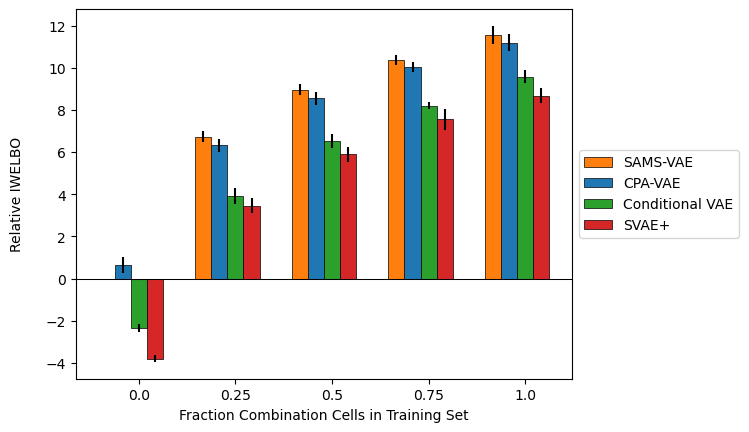

In [11]:
plot_aggregated_results_bar(aggregated_results, "test/IWELBO_relative")

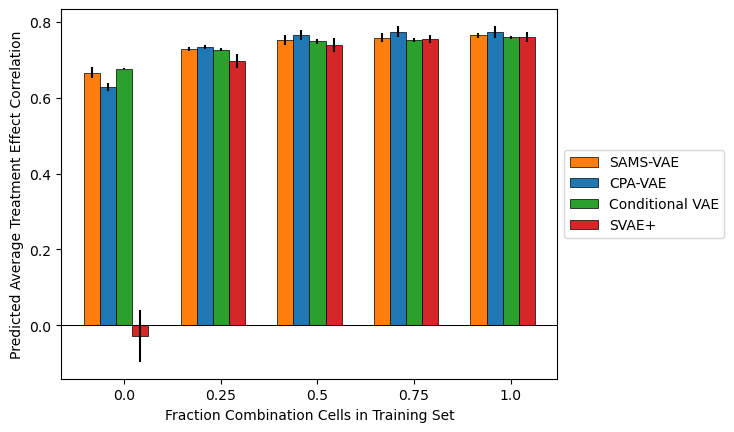

In [12]:
plot_aggregated_results_bar(aggregated_results, "ATE_pearsonr-test")

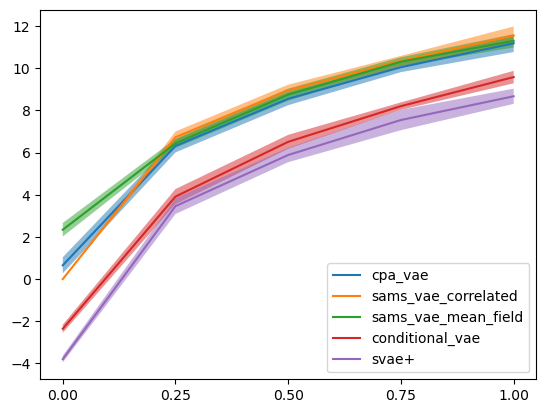

In [13]:
_ = plot_aggregated_results(aggregated_results, "test/IWELBO_relative")

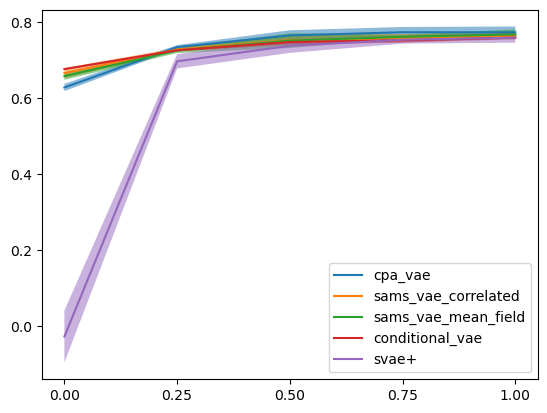

In [14]:
_ = plot_aggregated_results(aggregated_results, "ATE_pearsonr-test")

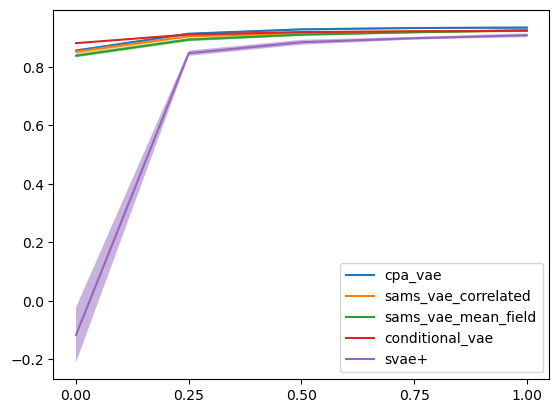

In [15]:
_ = plot_aggregated_results(aggregated_results, "ATE_pearsonr_top20-test")

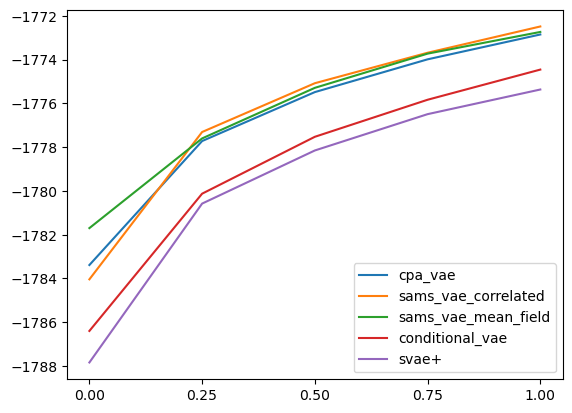

In [16]:
_ = plot_aggregated_results(aggregated_results, "test/IWELBO", show_standard_deviation=False)

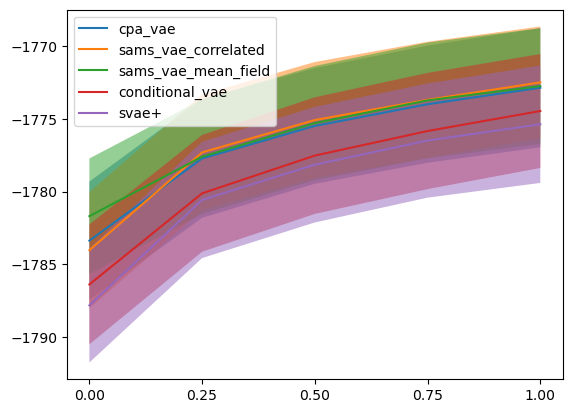

In [17]:
_ = plot_aggregated_results(aggregated_results, "test/IWELBO")